In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
incidents = pd.read_csv('../data/Aggregated/incidents.csv', )
incidents['Multiple Drugs'] = 0
incidents.loc[incidents['All Drugs'].str.contains(' | ', regex = False), 'Multiple Drugs'] = 1

In [24]:
md_and_naloxone = incidents.groupby(['Multiple Drugs', 'Naloxone Administered'])
temp = md_and_naloxone.agg({'Survive':'sum'})
temp['Cases'] = md_and_naloxone.size()

In [25]:
temp['% survive'] = (temp['Survive'] / temp['Cases']) * 100
temp.reset_index(inplace=True)
temp.rename(columns = {'% survive': '% Survival'}, inplace = True)
temp['Multiple Drugs'] = temp['Multiple Drugs'].map(lambda x: 'Yes' if x == 1 else 'No')
temp['Naloxone Administered'] = temp['Naloxone Administered'].map(lambda x: 'Yes' if x == 1 else 'No')

In [26]:
naloxone_yes = temp[temp['Naloxone Administered'] == 'Yes']
naloxone_no = temp[temp['Naloxone Administered'] == 'No']
naloxone_yes

,Multiple Drugs,Naloxone Administered,Survive,Cases,% Survival
1,No,Yes,7813,8616,90.680130
3,Yes,Yes,4330,5073,85.353834


<AxesSubplot:xlabel='Multiple Drugs', ylabel='% Survival'>

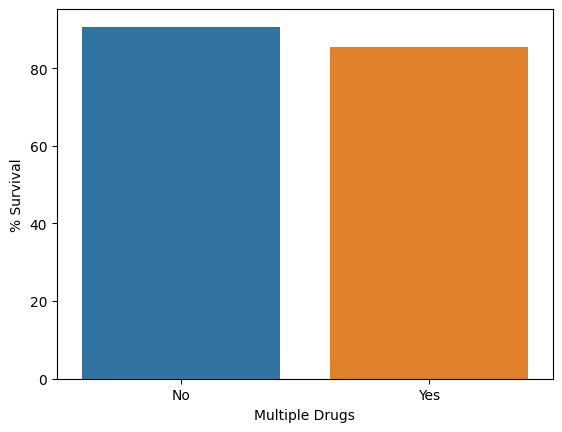

In [27]:
sns.barplot(naloxone_yes, x = 'Multiple Drugs', y = '% Survival')

<AxesSubplot:xlabel='Multiple Drugs', ylabel='% Survival'>

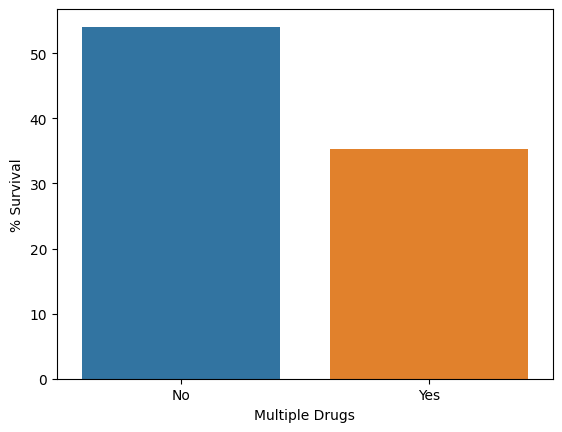

In [28]:
sns.barplot(naloxone_no, x = 'Multiple Drugs', y = '% Survival')